<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 2

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Análise do dataset 'precipitacao.csv'**

## 1.1 Apresente graficamente o comportamento da precipitação como função do tempo.

## 1.2 Faça a decomposição da série em 3 partes: 'Tendência', 'Sazonalidade' e 'Resíduo'. Para cada componente, faça os seguintes itens:
- Apresente graficamente o comportamento da 'Tendência', 'Sazonalidade' e 'Resíduo' como função do tempo.
- Teste a estacionaridade para cada componente.
- Teste a normalidade para cada componente.
    
## 1.3 Faça a transformação cúbica e logaritmica. Para cada transformação, faça uma diferenciação. Em quais operações é possível obter uma evolução estacionária e/ou normal?


### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados de Precipitação

In [ ]:
!gdown 1Wa__6Zk9kc7Ycr5OP9MWnK-4tX9ik3ed

Downloading...
From: https://drive.google.com/uc?id=1Wa__6Zk9kc7Ycr5OP9MWnK-4tX9ik3ed
To: /content/precipitacao.csv
100% 2.67k/2.67k [00:00<00:00, 9.88MB/s]


In [ ]:
df = pd.read_csv('precipitacao.csv')

In [ ]:
df.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.9,242.9,230.0,59.0,126.2,14.6,4.0,21.80,126.1,71.1,111.3,155.2
1,1986,199.6,221.0,218.7,106.5,113.1,3.9,30.3,27.85,34.5,60.7,242.5,389.9
2,1987,525.8,249.3,161.3,98.1,293.8,183.9,11.8,30.90,80.2,84.8,72.7,152.1
3,1988,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.20,28.4,173.9,100.2,289.8
4,1989,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.90,52.1,80.1,88.0,236.7


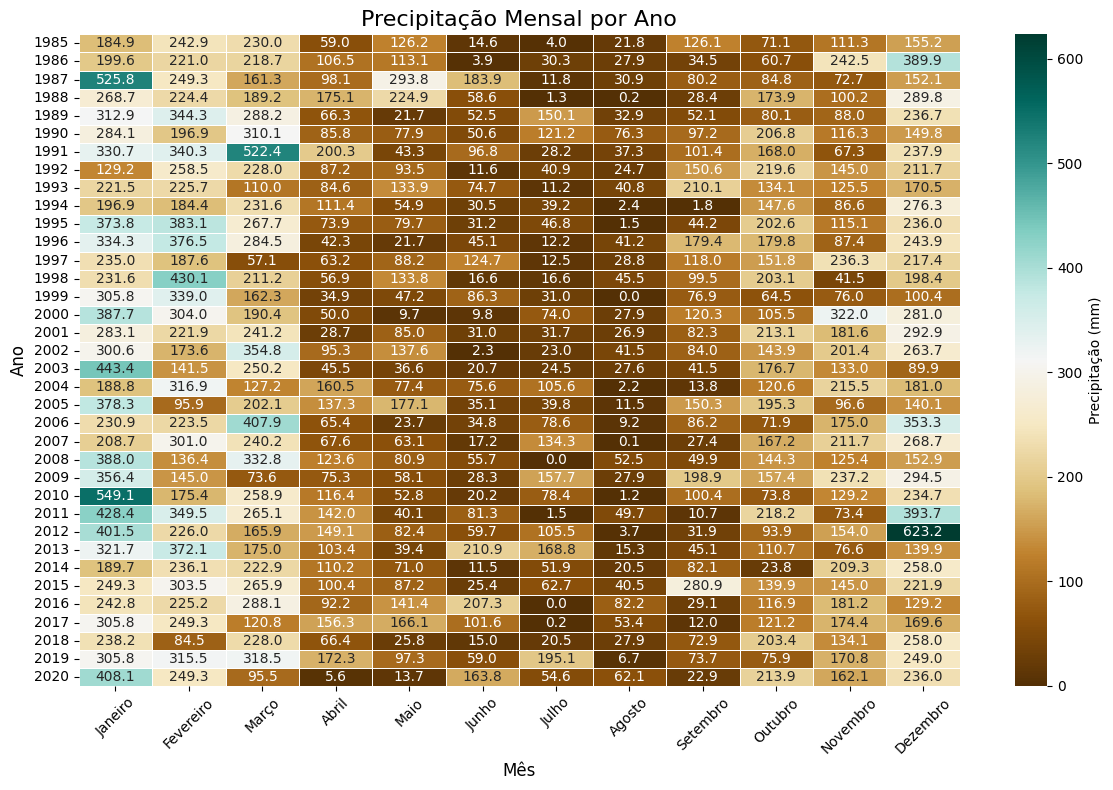

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.set_index("Ano"), cmap="BrBG", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={"label": "Precipitação (mm)"})

plt.title("Precipitação Mensal por Ano", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Ano", fontsize=12)

plt.xticks(rotation=45, ha="center")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
df.drop('Ano', axis=1, inplace=True)

series = pd.Series(df.values.flatten(), index=pd.date_range('1/1/1985', periods=432, freq='ME'), name='precipitacao')

In [ ]:
import scipy.stats as stats
import statsmodels.tsa.stattools

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)

def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

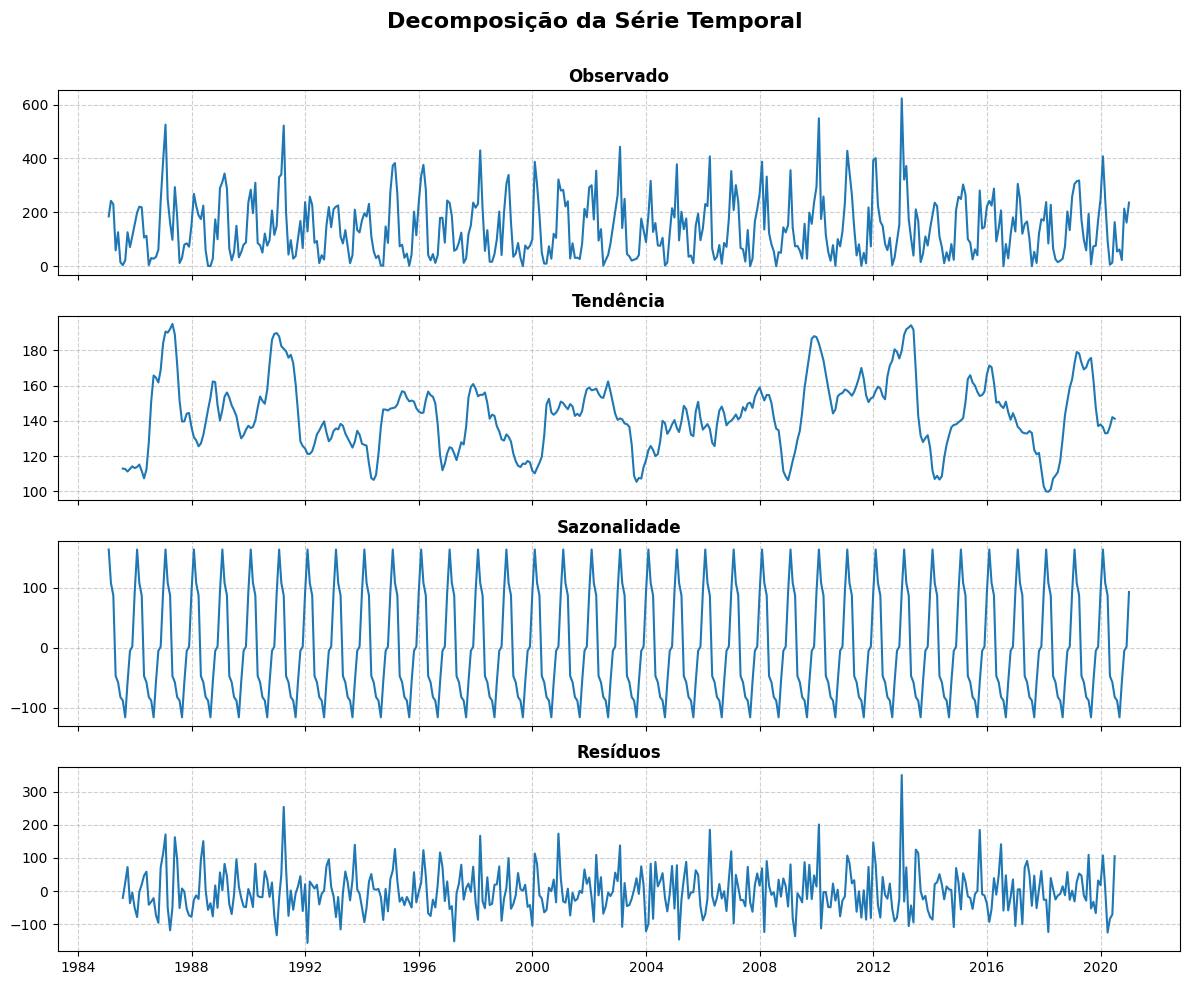

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao1 = seasonal_decompose(series, period=12)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Títulos e componentes
components = ['Observado', 'Tendência', 'Sazonalidade', 'Resíduos']
plots = [decomposicao1.observed, decomposicao1.trend, decomposicao1.seasonal, decomposicao1.resid]

for ax, comp, title in zip(axes, plots, components):
    ax.plot(comp, linewidth=1.5)
    ax.set_title(title, fontsize=12, weight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Decomposição da Série Temporal', fontsize=16, weight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

In [ ]:
teste_normalidade(decomposicao1.trend.dropna())
teste_estacionaridade(decomposicao1.trend.dropna())

A distribuição NÃO é normal
A série é estacionária


In [ ]:
teste_normalidade(decomposicao1.seasonal.dropna())
teste_estacionaridade(decomposicao1.seasonal.dropna())

A distribuição NÃO é normal
A série é estacionária


In [ ]:
teste_normalidade(decomposicao1.resid.dropna())
teste_estacionaridade(decomposicao1.resid.dropna())

A distribuição NÃO é normal
A série é estacionária


# SERIE LOGARÍTIMICA


In [ ]:
serie_log = np.log(series[series != 0])
serie_log

,precipitacao
1985-01-31,5.219815
1985-02-28,5.492650
1985-03-31,5.438079
1985-04-30,4.077537
1985-05-31,4.837868
...,...
2020-08-31,4.128746
2020-09-30,3.131137
2020-10-31,5.365509
2020-11-30,5.088213


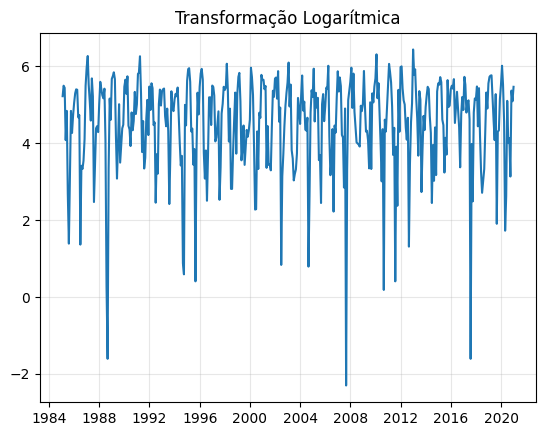

In [ ]:
plt.figure()
plt.title('Transformação Logarítmica')
plt.plot(serie_log)
plt.grid(alpha=0.3)

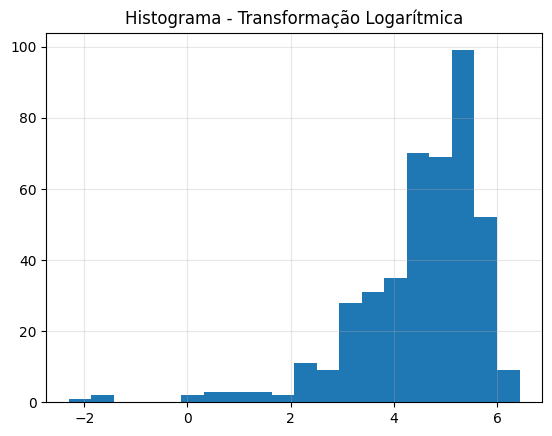

In [ ]:
plt.figure()
plt.title('Histograma - Transformação Logarítmica')
plt.hist(serie_log.dropna(), bins=20)
plt.grid(alpha=0.3)

In [ ]:
teste_normalidade(serie_log)
teste_estacionaridade(serie_log)

A distribuição NÃO é normal
A série é estacionária


In [ ]:
ser_log_diff = serie_log - serie_log.shift(1)
ser_log_diff

,precipitacao
1985-01-31,NaN
1985-02-28,0.272835
1985-03-31,-0.054571
1985-04-30,-1.360542
1985-05-31,0.760331
...,...
2020-08-31,0.128712
2020-09-30,-0.997609
2020-10-31,2.234372
2020-11-30,-0.277295


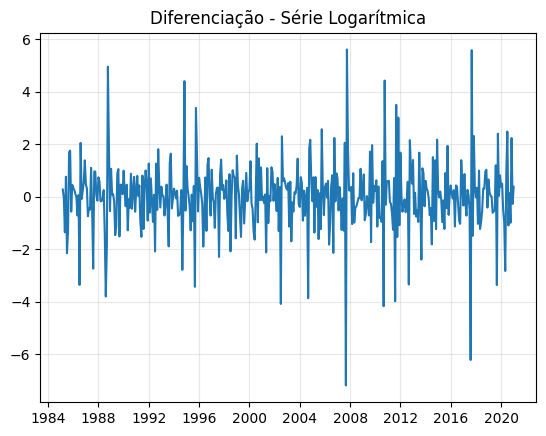

In [ ]:
plt.figure()
plt.title('Diferenciação - Série Logarítmica')
plt.plot(ser_log_diff)
plt.grid(alpha=0.3)

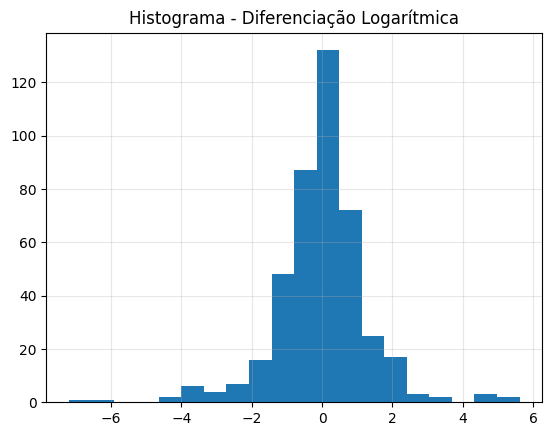

In [ ]:
plt.figure()
plt.title('Histograma - Diferenciação Logarítmica')
plt.hist(ser_log_diff.dropna(), bins=20)
plt.grid(alpha=0.3)

In [ ]:
teste_normalidade(ser_log_diff.dropna())
teste_estacionaridade(ser_log_diff.dropna())

A distribuição NÃO é normal
A série é estacionária


# Serie Cúbica

In [ ]:
serie_cubica = series**(1/3)
serie_cubica

,precipitacao
1985-01-31,5.696992
1985-02-28,6.239395
1985-03-31,6.126926
1985-04-30,3.892996
1985-05-31,5.015949
...,...
2020-08-31,3.960018
2020-09-30,2.839739
2020-10-31,5.980492
2020-11-30,5.452483


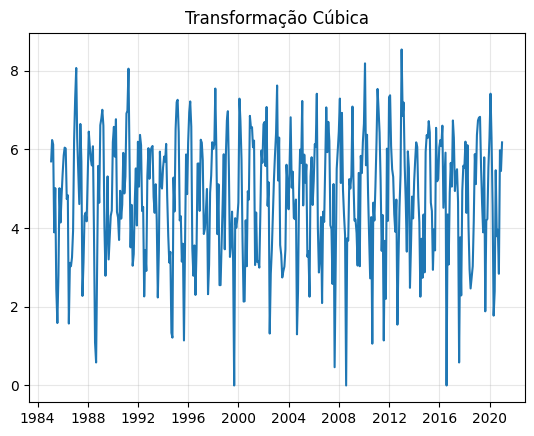

In [ ]:
plt.figure()
plt.title('Transformação Cúbica')
plt.plot(serie_cubica)
plt.grid(alpha=0.3)

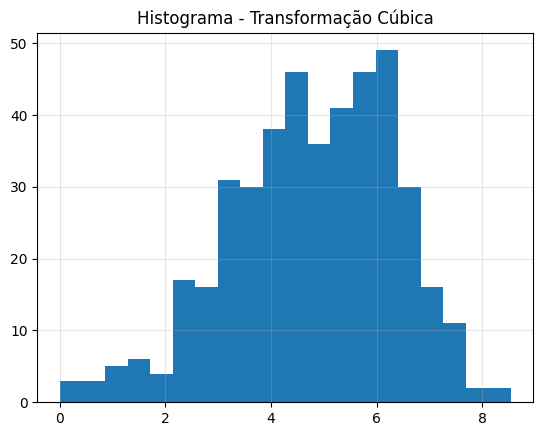

In [ ]:
plt.figure()
plt.title('Histograma - Transformação Cúbica')
plt.hist(serie_cubica.dropna(), bins=20)
plt.grid(alpha=0.3)

In [ ]:
teste_normalidade(serie_cubica.dropna())
teste_estacionaridade(serie_cubica.dropna())

A distribuição NÃO é normal
A série é estacionária


In [ ]:
serie_cubica_diff = serie_cubica - serie_cubica.shift(1)
serie_cubica_diff

,precipitacao
1985-01-31,NaN
1985-02-28,0.542403
1985-03-31,-0.112470
1985-04-30,-2.233929
1985-05-31,1.122953
...,...
2020-08-31,0.166308
2020-09-30,-1.120279
2020-10-31,3.140753
2020-11-30,-0.528009


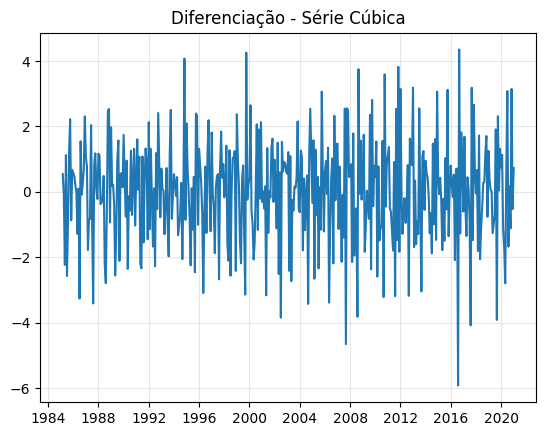

In [ ]:
plt.figure()
plt.title('Diferenciação - Série Cúbica')
plt.plot(serie_cubica_diff)
plt.grid(alpha=0.3)

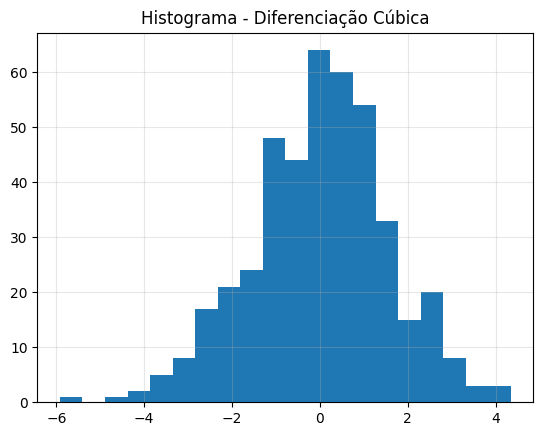

In [ ]:
plt.figure()
plt.title('Histograma - Diferenciação Cúbica')
plt.hist(serie_cubica_diff.dropna(), bins=20)
plt.grid(alpha=0.3)

In [ ]:
teste_normalidade(serie_cubica_diff.dropna())
teste_estacionaridade(serie_cubica_diff.dropna())

A distribuição é normal
A série é estacionária
